In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense,Input
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [ ]:
train_csv = pd.read_csv("./Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("./Human Action Recognition/Testing_set.csv")

In [ ]:
train_fol = glob.glob("./Human Action Recognition/train/*") 
test_fol = glob.glob("./Human Action Recognition/test/*")


In [ ]:
classes=train_csv.label.value_counts()
num_classes=len(classes)
num_classes
classes

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [ ]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [ ]:
filename = train_csv['filename']
situation = train_csv['label']

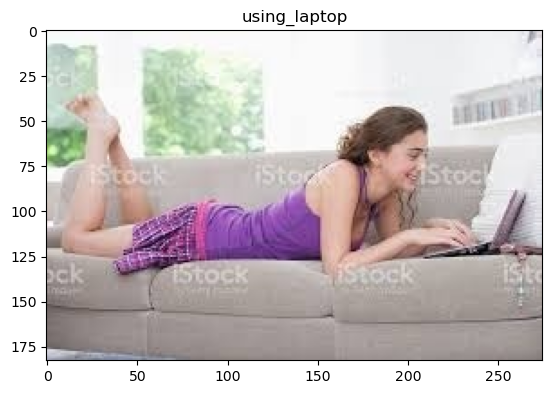

In [ ]:
imgg = "Image_{}.jpg".format(2)
train = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/"
testImage = img.imread(train + imgg)
plt.imshow(testImage)
plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))
plt.show()

#  **Pre Processing**

In [ ]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [ ]:
inp_shape = (160, 160,3)

In [ ]:
arr = img_data
arr = np.asarray(arr)
type(arr)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=num_classes,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14,985,039
Trainable params: 270,351
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history = vgg_model.fit(arr,y_train, epochs=10)

Epoch 1/10
394/394 [==============================] - 34s 67ms/step - loss: 2.1549 - accuracy: 0.4490
Epoch 2/10
394/394 [==============================] - 26s 66ms/step - loss: 1.2157 - accuracy: 0.6051
Epoch 3/10
394/394 [==============================] - 28s 71ms/step - loss: 0.9563 - accuracy: 0.6886
Epoch 4/10
394/394 [==============================] - 28s 70ms/step - loss: 0.7498 - accuracy: 0.7510
Epoch 5/10
394/394 [==============================] - 27s 68ms/step - loss: 0.5695 - accuracy: 0.8130
Epoch 6/10
394/394 [==============================] - 27s 70ms/step - loss: 0.4044 - accuracy: 0.8660
Epoch 7/10
394/394 [==============================] - 27s 70ms/step - loss: 0.3188 - accuracy: 0.8949
Epoch 8/10
394/394 [==============================] - 27s 69ms/step - loss: 0.2111 - accuracy: 0.9331
Epoch 9/10
394/394 [==============================] - 27s 69ms/step - loss: 0.1675 - accuracy: 0.9467
Epoch 10/10
394/394 [==============================] - 27s 70ms/step - loss: 0.139

In [15]:
vgg_model.save_weights("model.h5")

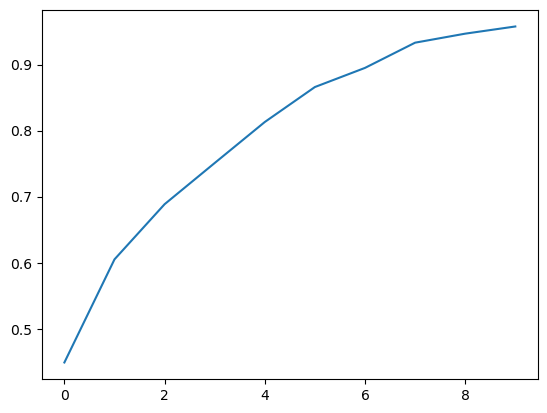

In [16]:
accurate = history.history['accuracy']
plt.plot(accurate)

# **Inference Pipeline**

In [17]:
def test_predict(test_image):
    situation=["sitting","using_laptop","hugging","sleeping","drinking",
           "clapping","dancing","cycling","calling","laughing"
          ,"eating","fighting","listening_to_music","running","texting"]
    image = Image.open(test_image)
    input_img = np.asarray(image.resize((160,160)))
    result = vgg_model.predict(np.asarray([input_img]))
#     print('result:{}'.format(result))
    itemindex = np.where(result==np.max(result))
    print('itemindex:{}'.format(itemindex))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", situation[prediction])

    image = img.imread(test_image)
    plt.imshow(image)
 

1/1 [==============================] - 1s 756ms/step
itemindex:(array([0]), array([9]))
probability: 99.96671676635742%
Predicted class :  laughing


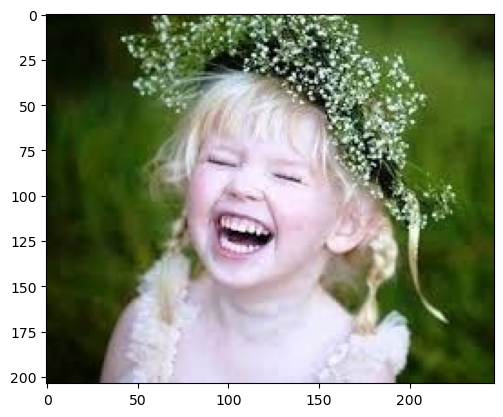

In [18]:
test_predict('../input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_58.jpg')

In [19]:
test_csv

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
5395,Image_5396.jpg
5396,Image_5397.jpg
5397,Image_5398.jpg
5398,Image_5399.jpg


In [20]:
test_filename = train_csv['filename']
test_situation = train_csv['label']
test_data = []
test_label = []
length = len(train_fol)
for i in (range(len(train)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + test_filename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(test_situation[i])

In [21]:
test_arr = test_data
test_arr = np.asarray(test_arr)
type(test_arr)

numpy.ndarray

In [22]:
y_test = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_test[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
vgg_model.evaluate(arr,y_test)

394/394 [==============================] - 29s 72ms/step - loss: 0.1286 - accuracy: 0.9592


[0.12863034009933472, 0.9592063426971436]

# Custom CNN Model

In [24]:
model=Sequential()

model.add(Input(shape=(160,160,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)     

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(arr,y_train, epochs=50)

Epoch 1/50
394/394 [==============================] - 16s 29ms/step - loss: 2.8324 - accuracy: 0.1227
Epoch 2/50
394/394 [==============================] - 11s 27ms/step - loss: 2.4073 - accuracy: 0.2059
Epoch 3/50
394/394 [==============================] - 10s 27ms/step - loss: 2.2544 - accuracy: 0.2574
Epoch 4/50
394/394 [==============================] - 10s 27ms/step - loss: 2.0820 - accuracy: 0.3153
Epoch 5/50
394/394 [==============================] - 11s 27ms/step - loss: 1.9402 - accuracy: 0.3670
Epoch 6/50
394/394 [==============================] - 11s 27ms/step - loss: 1.7800 - accuracy: 0.4190
Epoch 7/50
394/394 [==============================] - 10s 27ms/step - loss: 1.6110 - accuracy: 0.4744
Epoch 8/50
394/394 [==============================] - 10s 27ms/step - loss: 1.4113 - accuracy: 0.5450
Epoch 9/50
394/394 [==============================] - 10s 27ms/step - loss: 1.2029 - accuracy: 0.6038
Epoch 10/50
394/394 [==============================] - 10s 27ms/step - loss: 1.001

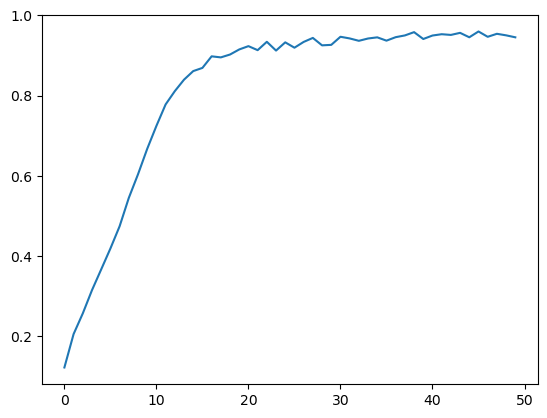

In [27]:
accuracy = history.history['accuracy']
plt.plot(accuracy)

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history2=model.fit(arr,y_train, epochs=40)

Epoch 1/40
394/394 [==============================] - 13s 27ms/step - loss: 0.2294 - accuracy: 0.9460
Epoch 2/40
394/394 [==============================] - 10s 27ms/step - loss: 0.1521 - accuracy: 0.9605
Epoch 3/40
394/394 [==============================] - 10s 26ms/step - loss: 0.1976 - accuracy: 0.9500
Epoch 4/40
394/394 [==============================] - 11s 27ms/step - loss: 0.1796 - accuracy: 0.9548
Epoch 5/40
394/394 [==============================] - 10s 27ms/step - loss: 0.1750 - accuracy: 0.9577
Epoch 6/40
394/394 [==============================] - 11s 27ms/step - loss: 0.1829 - accuracy: 0.9558
Epoch 7/40
394/394 [==============================] - 10s 27ms/step - loss: 0.1744 - accuracy: 0.9563
Epoch 8/40
394/394 [==============================] - 10s 26ms/step - loss: 0.1251 - accuracy: 0.9679
Epoch 9/40
394/394 [==============================] - 10s 26ms/step - loss: 0.1459 - accuracy: 0.9624
Epoch 10/40
394/394 [==============================] - 10s 26ms/step - loss: 0.117

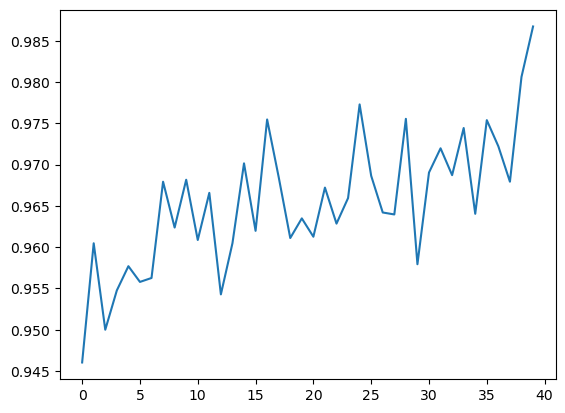

In [29]:
accuracy2 = history2.history['accuracy']
plt.plot(accuracy2)